<center>

<h1> Sudoku & Constraint Logic Programming </h1>
<h2> CS3100 Fall 2019 </h2>
</center>

## Review

### Preivously

* Relational Databases and their relationship to Prolog

### This lecture

* Solving Sudoku 
* Making sudoku more efficient with constraint logic programming

## Sudoku

<center>
    
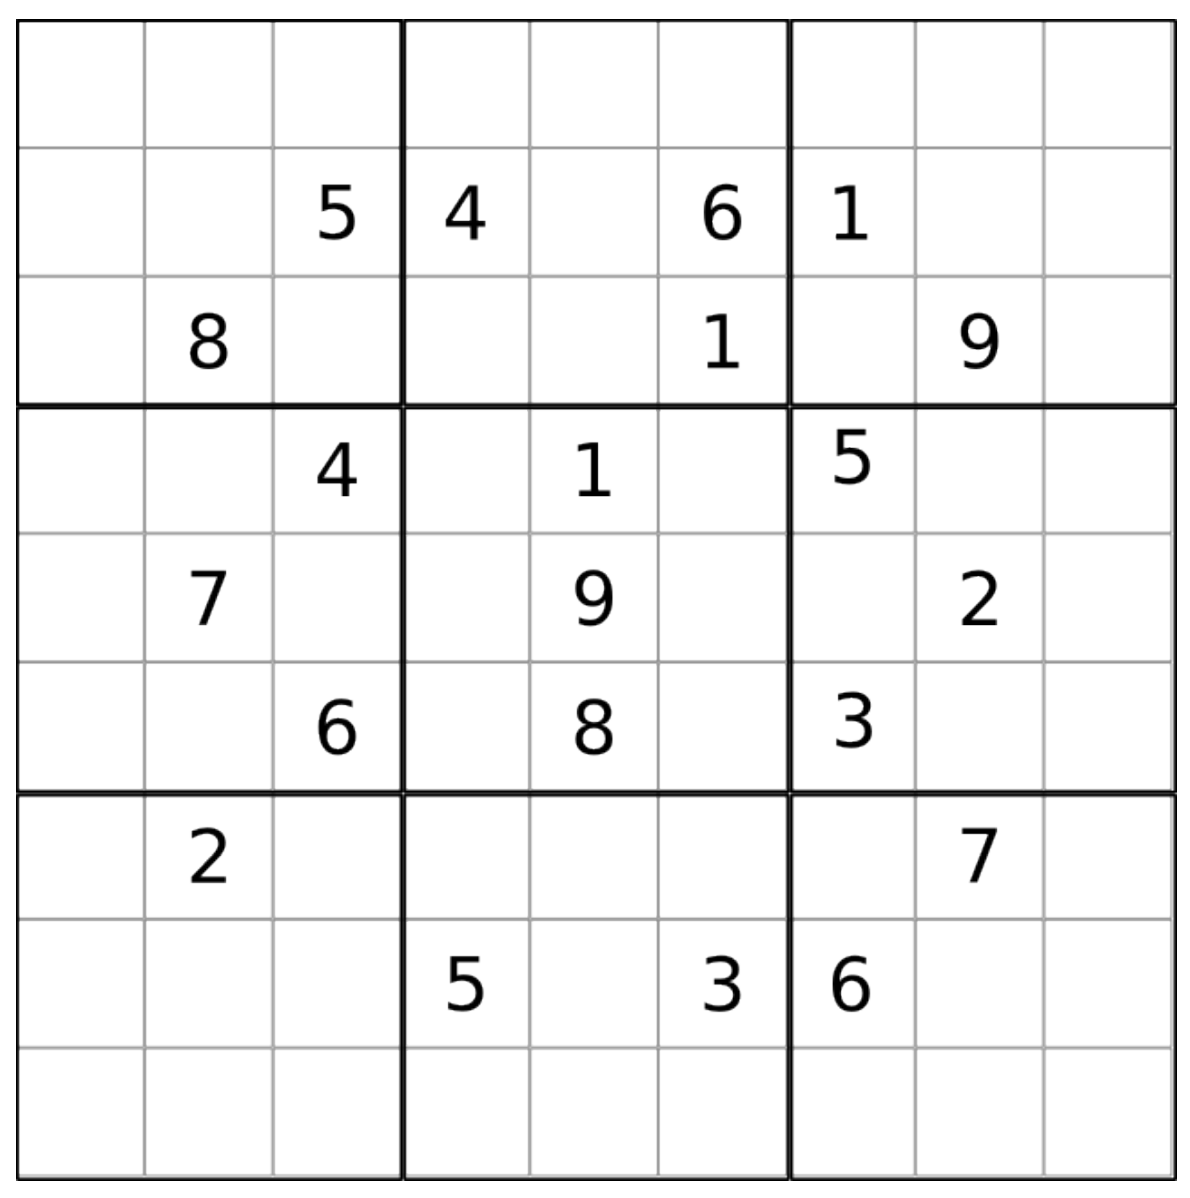
</center>

## Make the problem easier

<center>
    
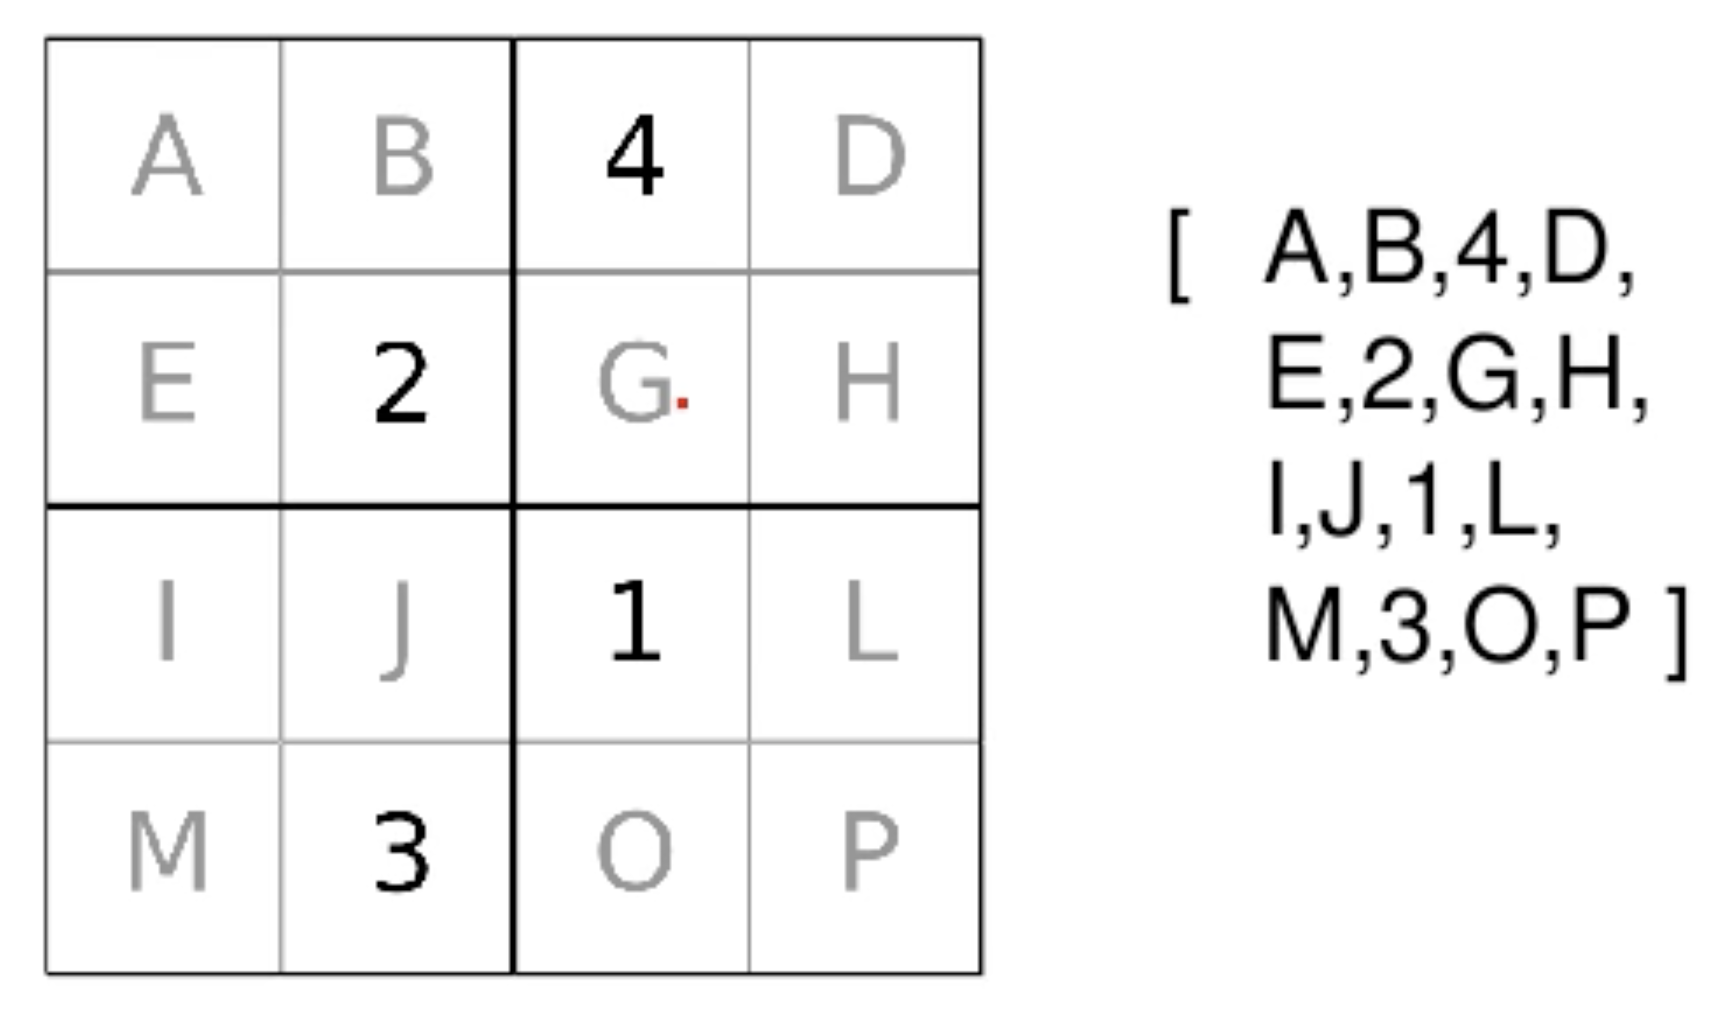
</center>

## Generate and test

Each row value is a permutation of `[1,2,3,4]`. So use the `perm/2` from earlier.

In [1]:
take([H|T],H,T).
take([H|T],R,[H|S]) :- take(T,R,S).
perm([],[]).
perm(L,[H|T]) :- take(L,H,R), perm(R,T).

Added 4 clauses(s).

In [2]:
diff(L) :- perm([1,2,3,4],L).

Added 1 clauses(s).

## Check

Are rows ok?

In [3]:
row([A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P]) :- 
  diff([A,B,C,D]), diff([E,F,G,H]),
  diff([I,J,K,L]), diff([M,N,O,P]).

Added 1 clauses(s).

Are columns ok?

In [4]:
col([A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P]) :-  
  diff([A,E,I,M]),diff([B,F,J,N]),
  diff([C,G,K,O]),diff([D,H,L,P]).

Added 1 clauses(s).

## Check

Are boxes ok?

In [5]:
box([A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P]) :- 
  diff([A,B,E,F]),diff([C,D,G,H]),
  diff([I,J,M,N]),diff([K,L,O,P]).

Added 1 clauses(s).

## Solving Sudoku

In [6]:
sudoku(L) :- row(L), col(L), box(L).

Added 1 clauses(s).

## Solving our sudoku problem

<center>

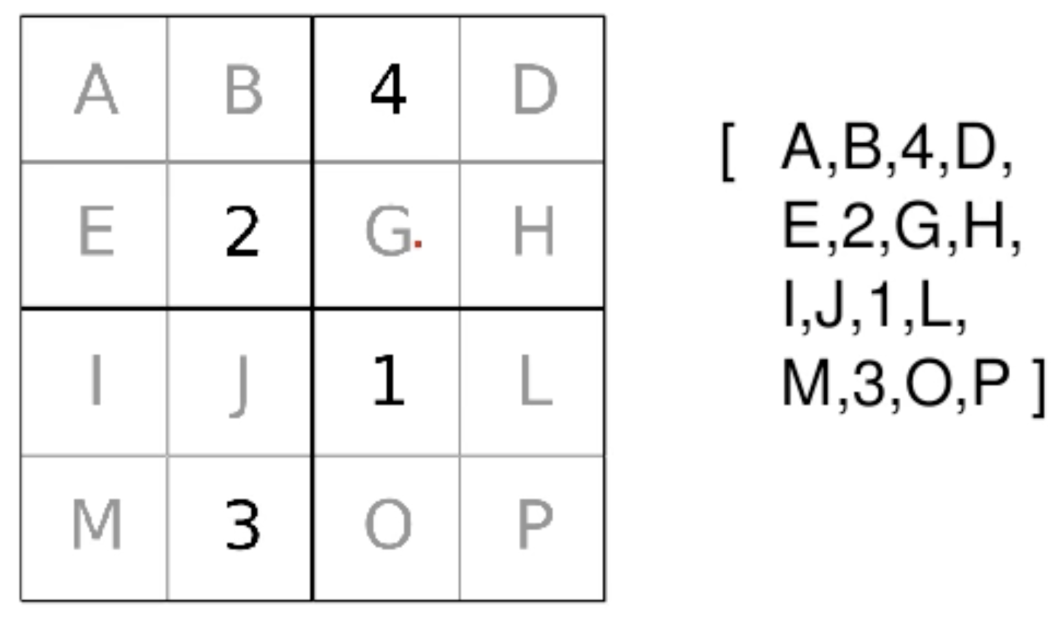
</center>

In [7]:
?- sudoku([A,B,4,D,E,2,G,H,I,J,1,L,M,3,O,P]).

A = 3, B = 1, E = 4, D = 2, G = 3, I = 2, H = 1, J = 4, M = 1, L = 3, O = 2, P = 4 .

## Scale up in the obvious way to 3x3

<center>

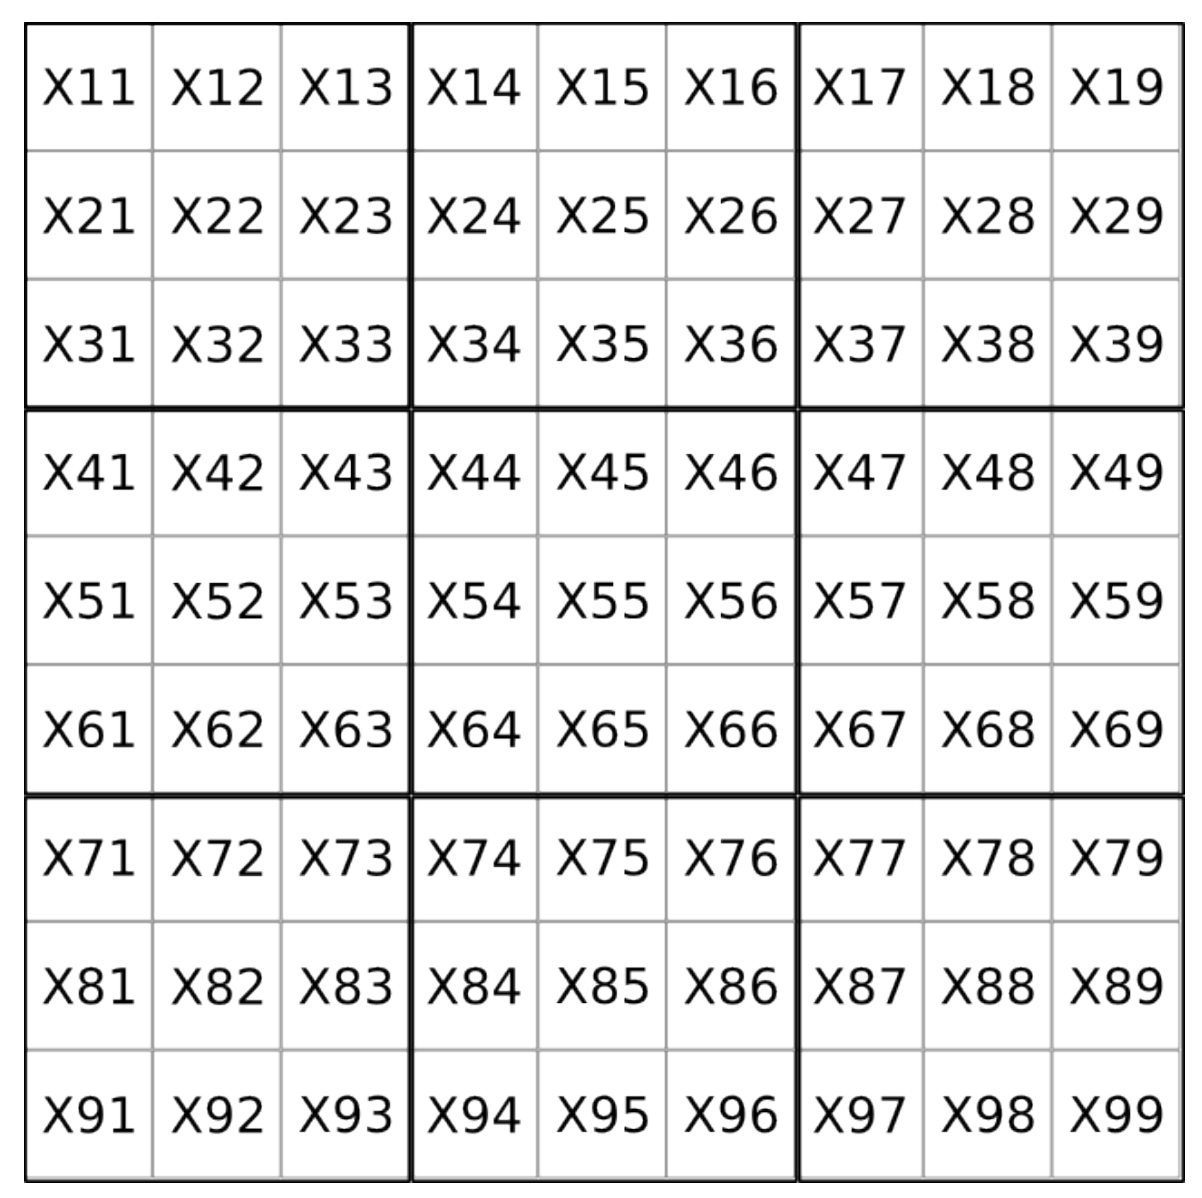
</center>

* Brute force is impractically slow for this problem.
  + There are very many valid grids: `6670903752021072936960 ≈ 6.671 × 10^21`
  + See http://www.afjarvis.staff.shef.ac.uk/sudoku/

## Constraint Logic Programming

* We can solve sudoku more efficiently with what is known as **Constraint Logic Programming**
* Prolog is limited to the single equality constraint (that two terms must unify)
  + We can generalise this to include other types of constraints (over integers, booleans, reals)
* Constrain logic programming is defined over 
  + **Domains:** the set of values the variables can take
  + **Constraints:** the domain specific constraints that you can write between the terms.
  + **Solver:** way to answer questions posed over those constraints.
* We usually write `CLP(X)` to define contraint logic programming over domain `X`.

## Constraint Logic Programming

* Plain prolog can be thought of as `CLP(H)`, where 
  + the domain `H` is the Herbrand base of the program and 
  + the constraint is just `=` unification.
  + SLD resolution is the solver
* For integers `CLP(FD)` where
  + the domain is integers; FD stands for finite domain.
  + the contraints can be `<`,`>`,`<=`,`>=`, etc.
  + Specialised `CLP(FD)` solver.

## Constraint Logic Programming 

* Constraints blend in naturally into Prolog programs, and behave exactly like plain Prolog predicates in those cases that can also be expressed without constraints. 
* Main differences:
  + Constraints can delay checks until their truth can be safely decided.
  + Order of expression of constraints doesn't matter.
  + Prune the search domain using a technique called constraint propagation. 
  + Generally much faster (which will come in handy for Sudoku).

## CLP(FD) Example

The following example fails due to instantiation error.

In [8]:
?- X > Y, member(X,[1,2,3]), Y=2.

: 

which can be fixed by reordering.

In [9]:
?- member(X,[1,2,3]), Y=2, X > Y.

Y = 2, X = 3 .

## CLP(FD) Example

Consider same problem encoded with constraints on integers. 

In [10]:
?- use_module(library(clpfd)).
?- X #> Y, X in 1..3, Y=2.

true.
Y = 2, X = 3 .

`#>` is a contraint from `clpfd` library.

## Contraint Propagation

What happens if we unify `Y` with 1.

In [11]:
?- X #> Y, X in 1..3, Y=1.

Y = 1, X = Variable(68) .

One more of those Jupyter + Prolog issue. On `swipl`, you get:

```
Y = 1,
X in 2..3.
```

which shows that `X`'s domain has been refined through constraint propagation.

## Labelling

We can run backtracking search over constraints through `label/1` which finds possible assignments for variables based on constraints. 

In [12]:
?- X #> Y, X in 1..3, Y=1, label([X]).

Y = 1, X = 2 ;
Y = 1, X = 3 .

## Sudoku : Domain

<center>
    
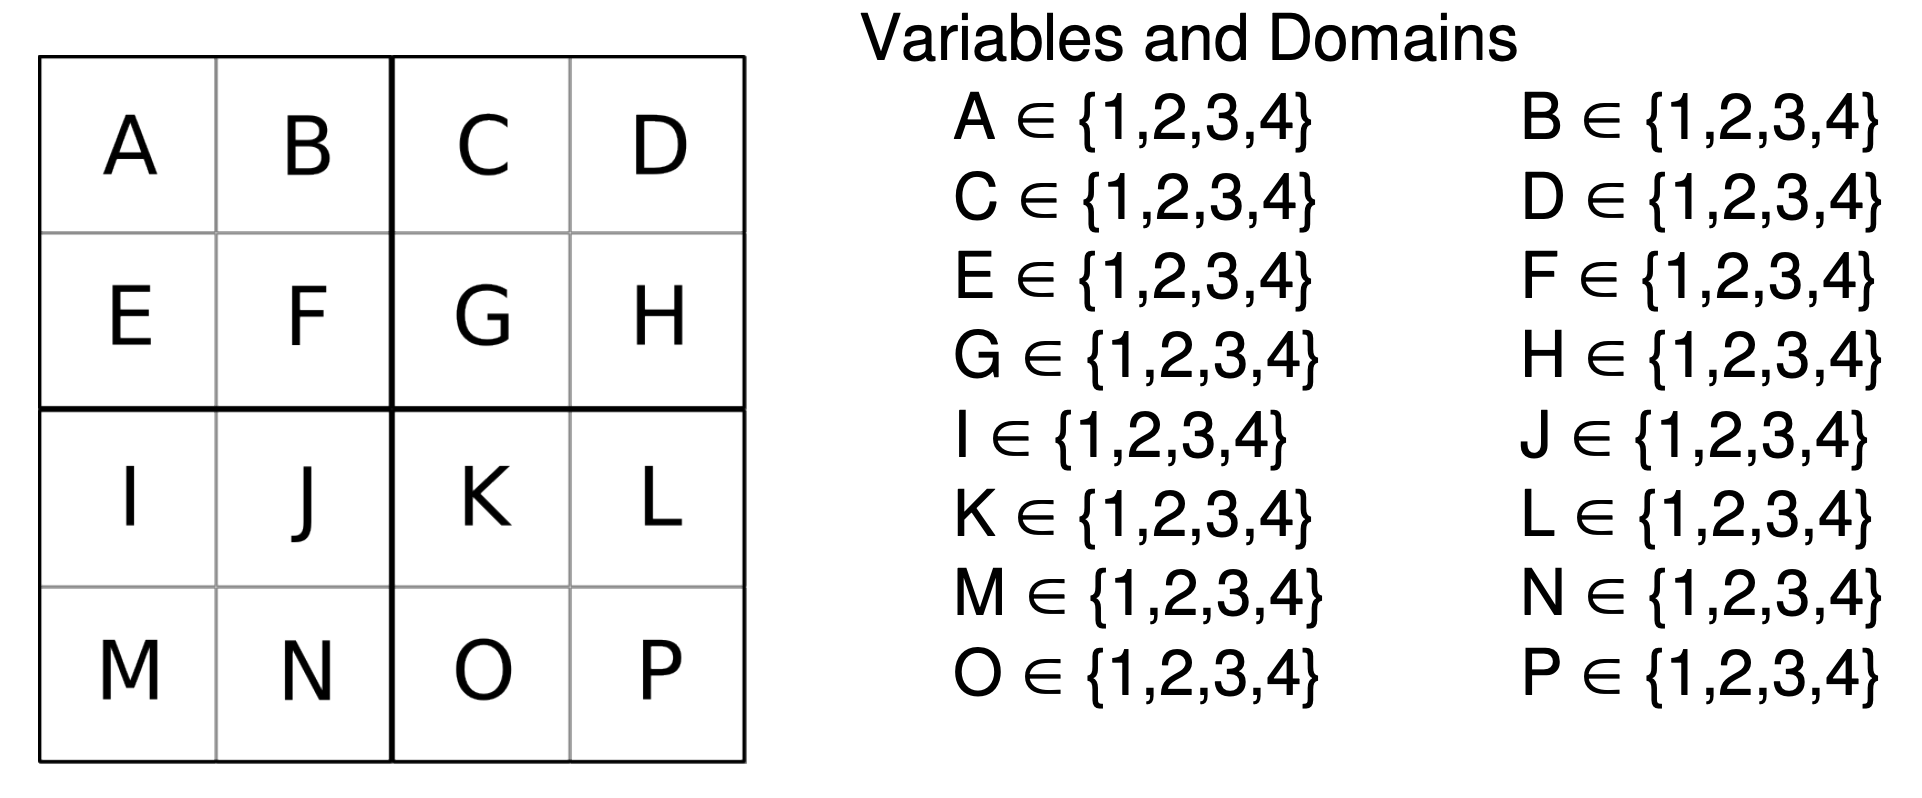
</center>

## Contraint on rows

All the values in rows are different

<center>
    
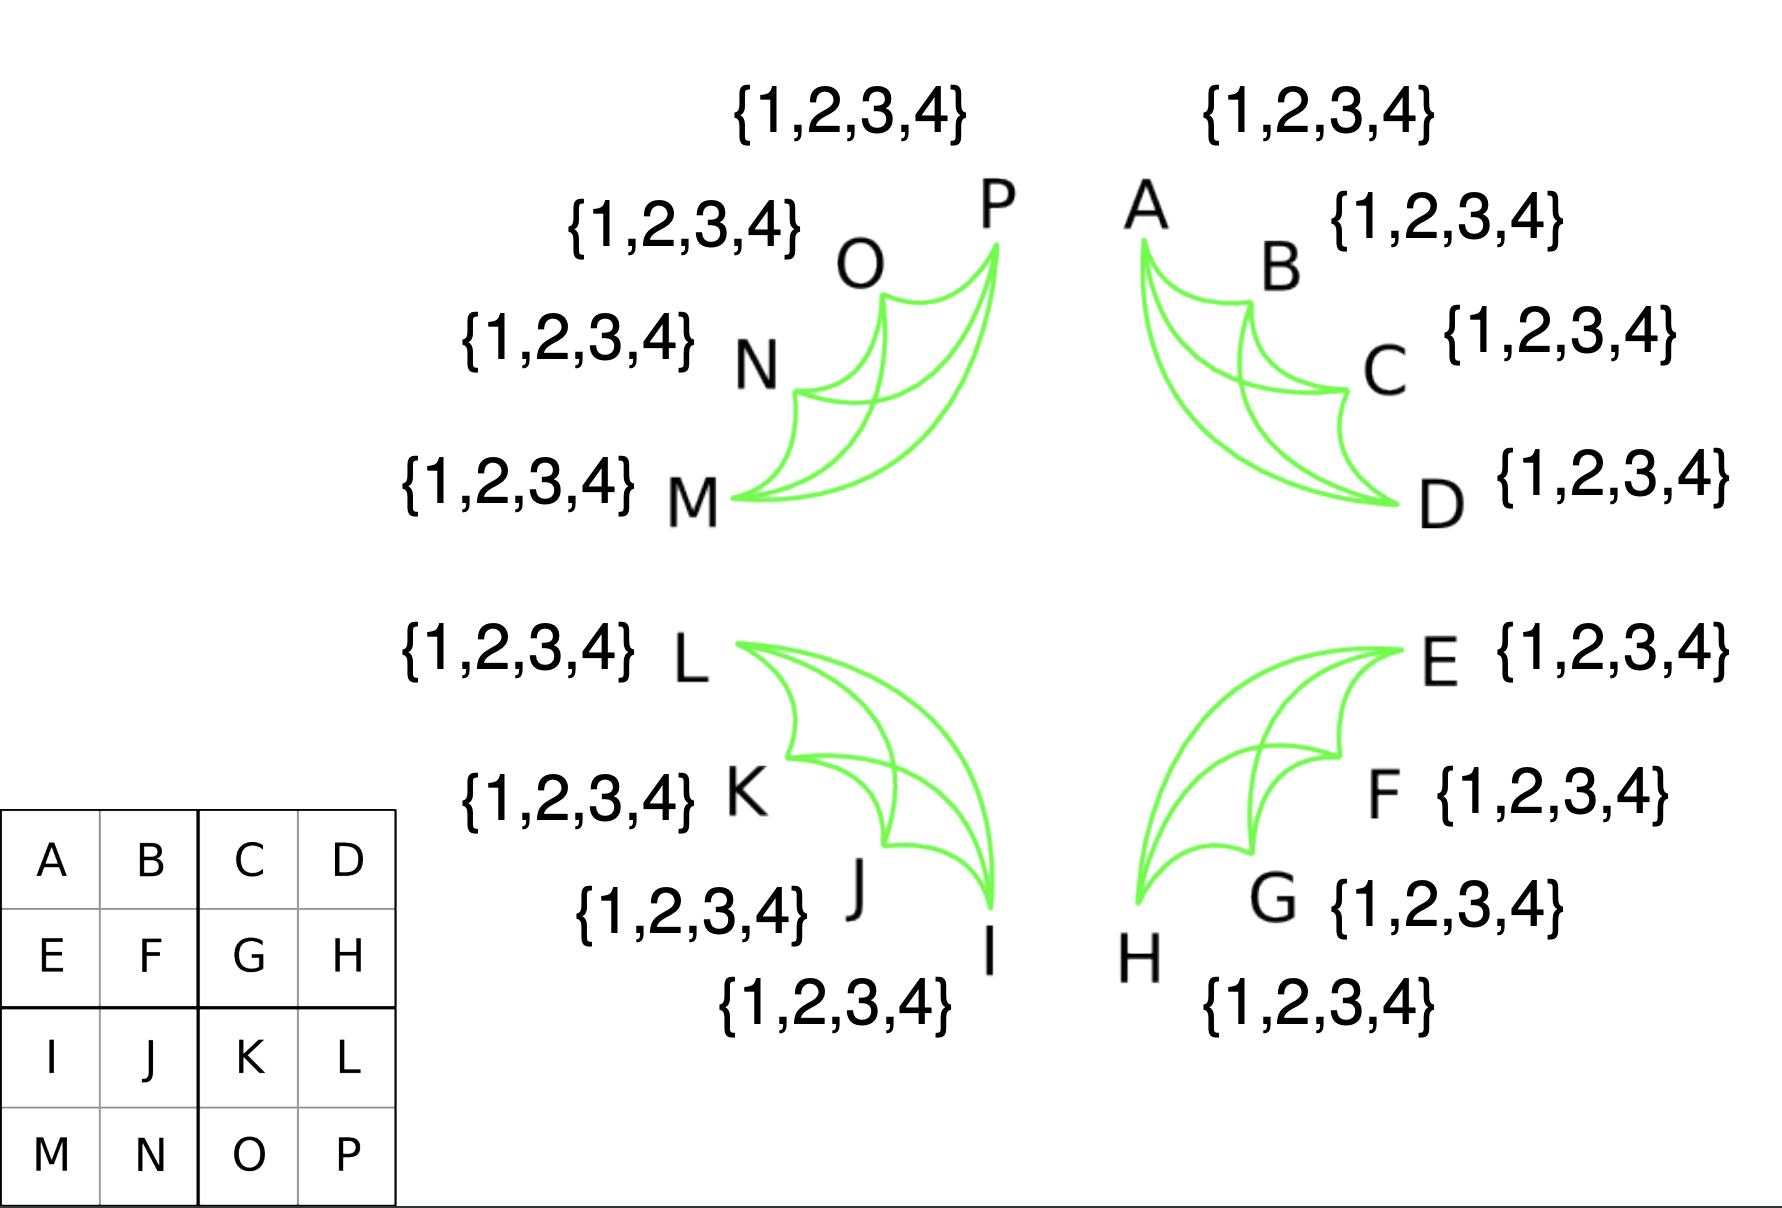
</center>

## Constraint of columns

All the column values are different

<center>
    
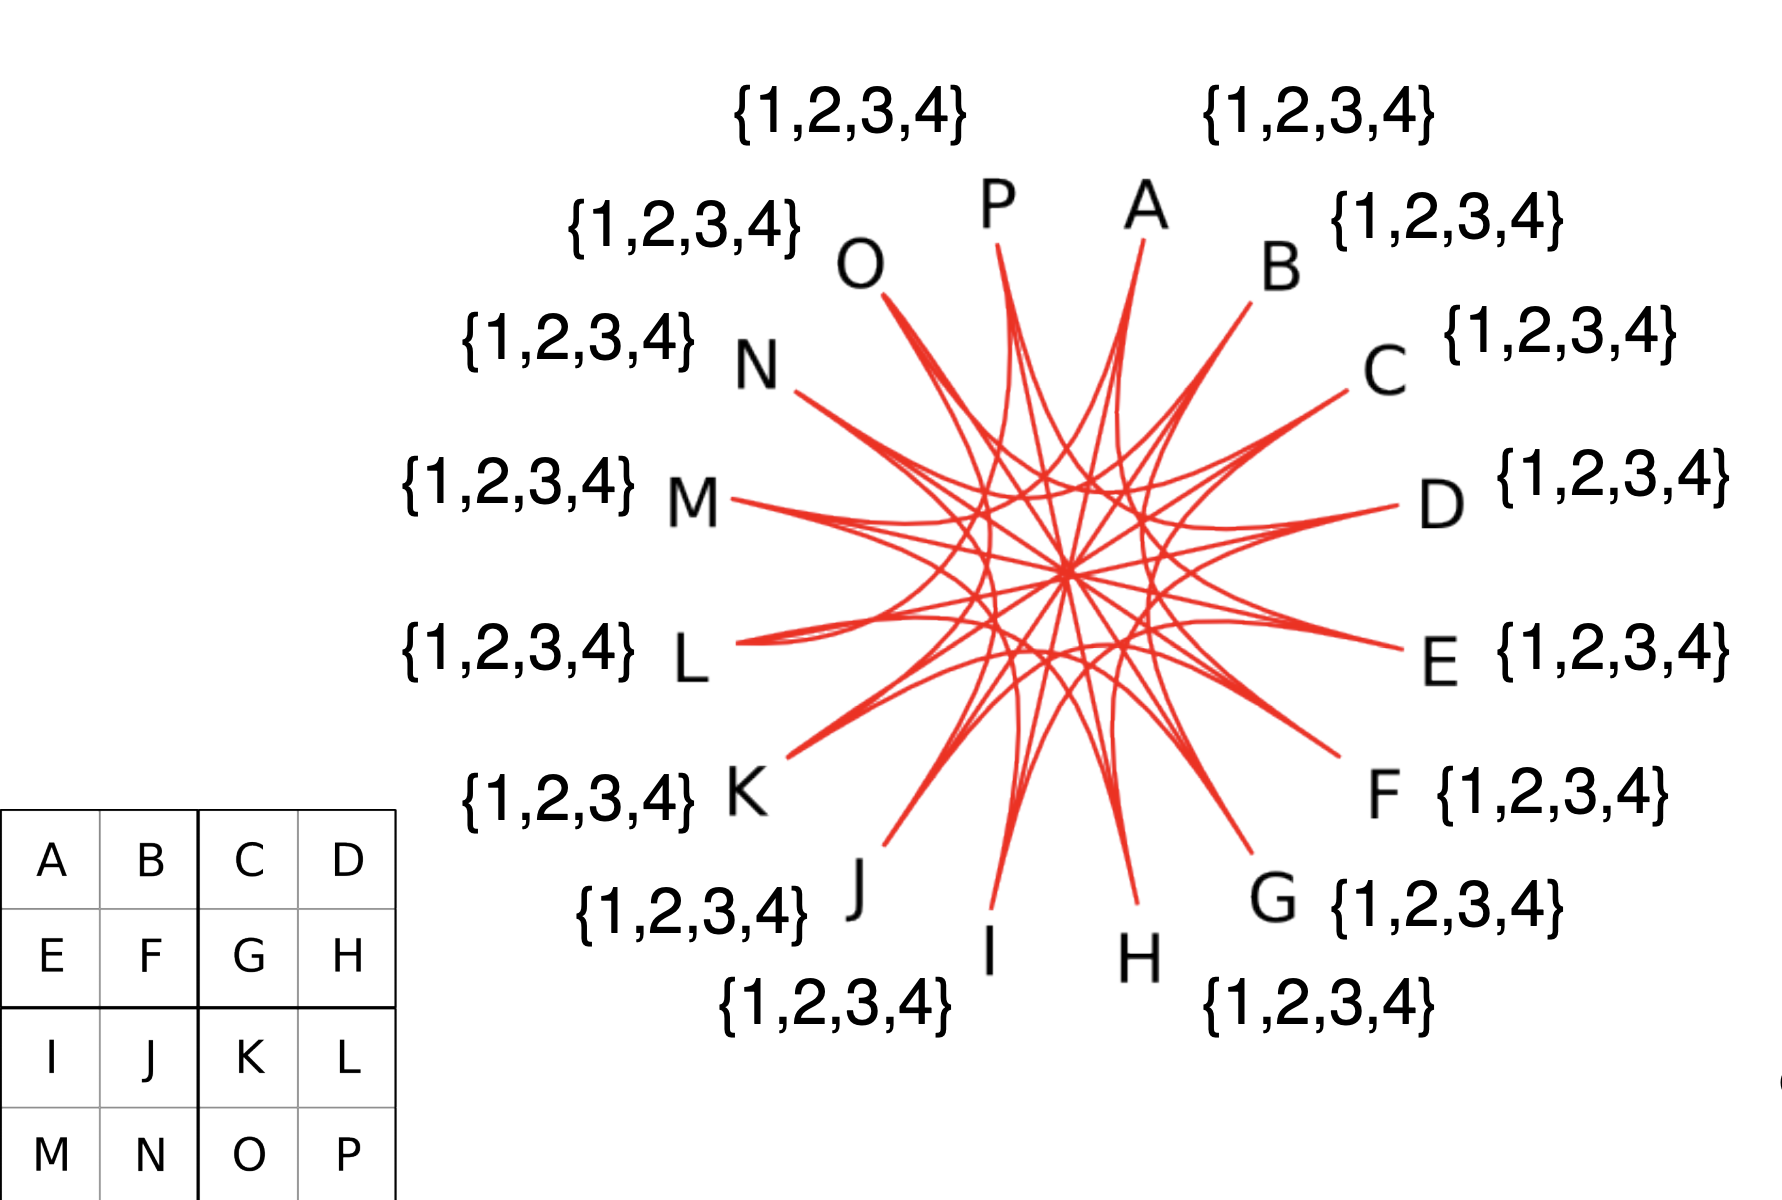
</center>

## Constraint on box

All the values in each box are different

<center>
    
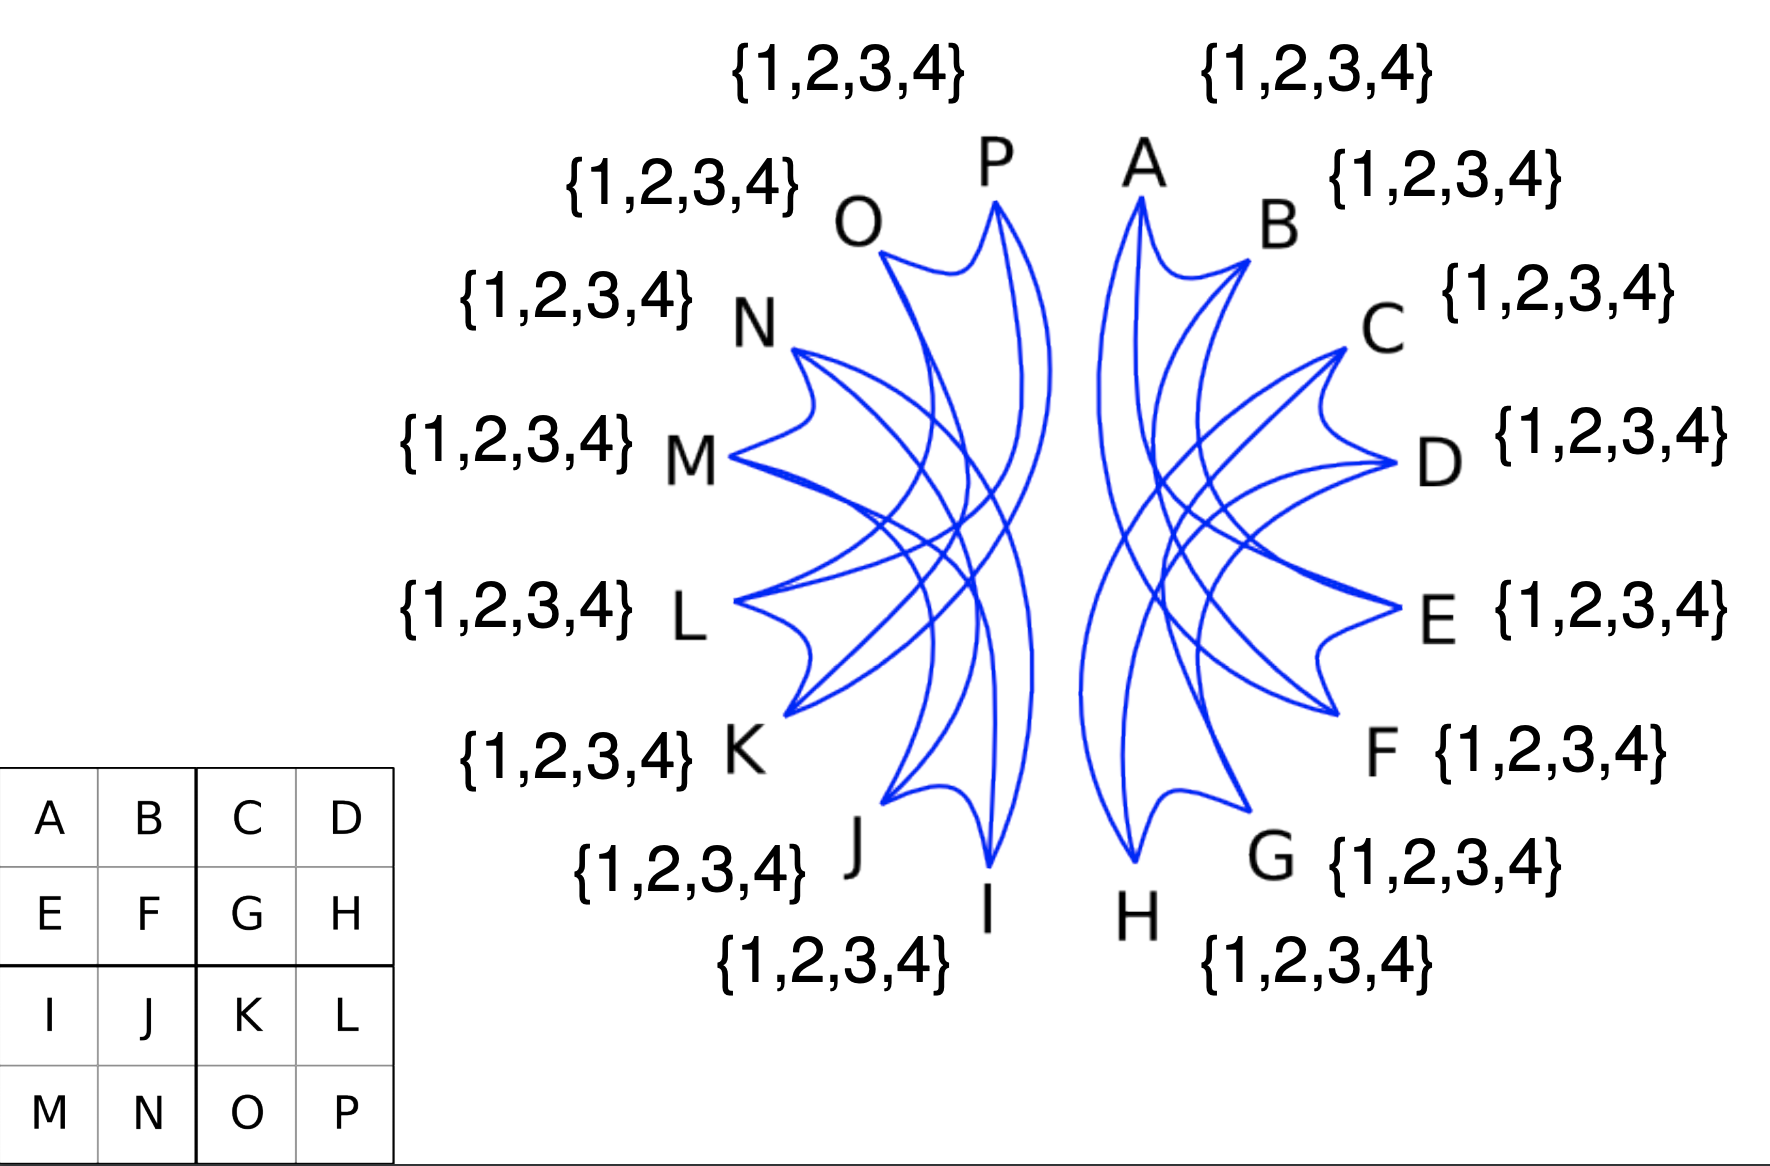
</center>

## All Constraints

<center>
    
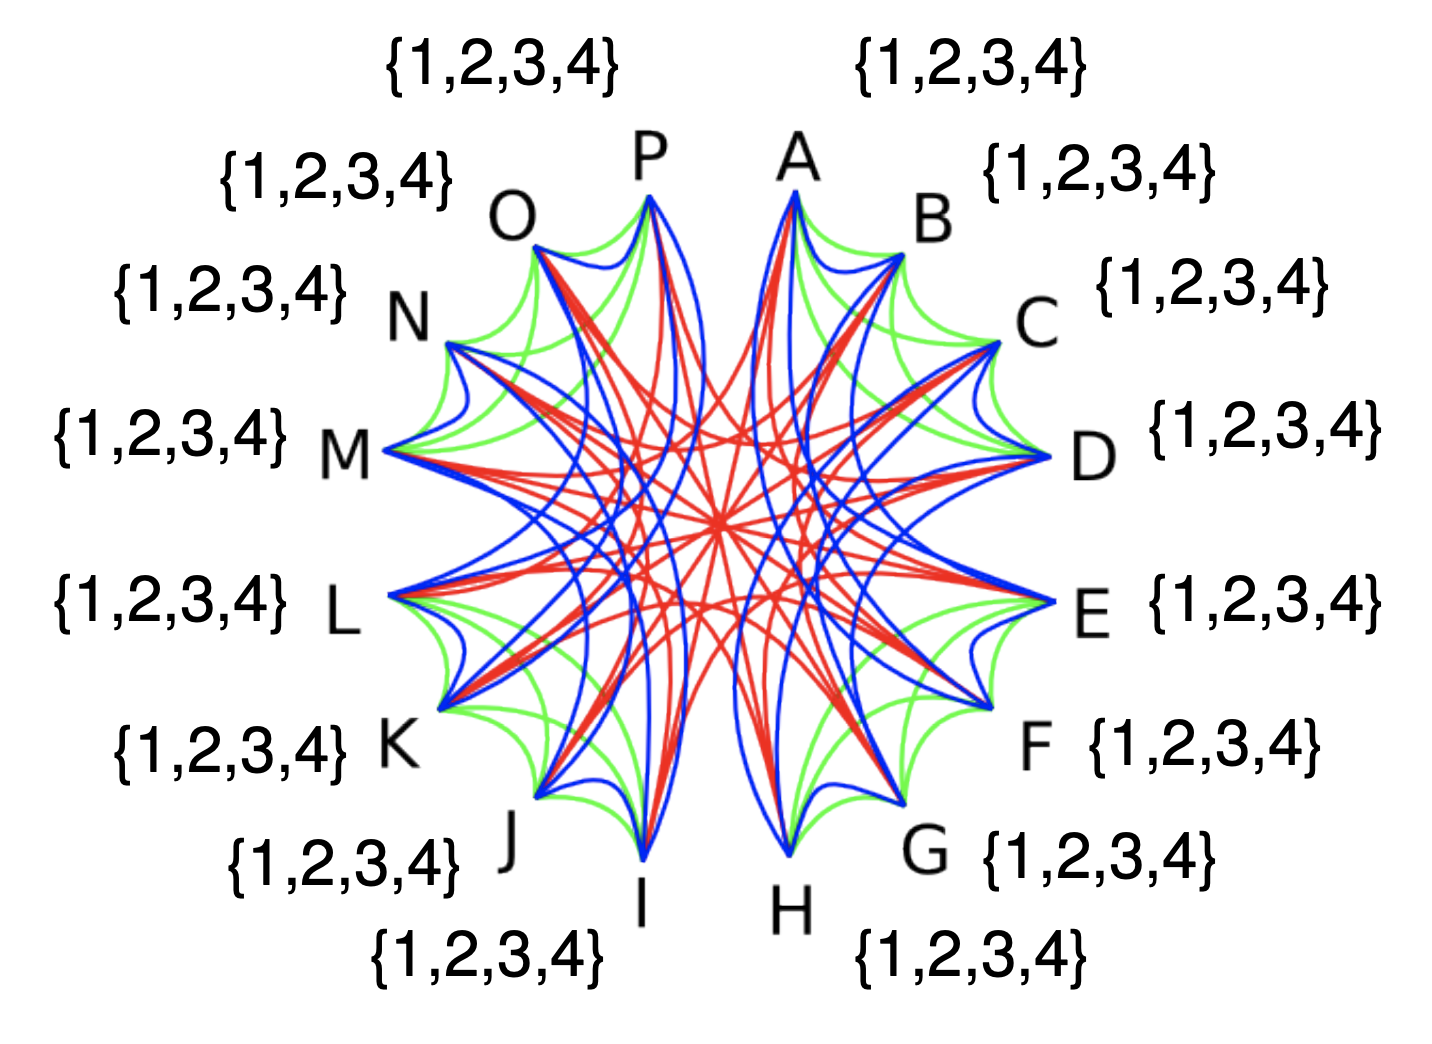
</center>

## Constraint Propagation

<center>
    
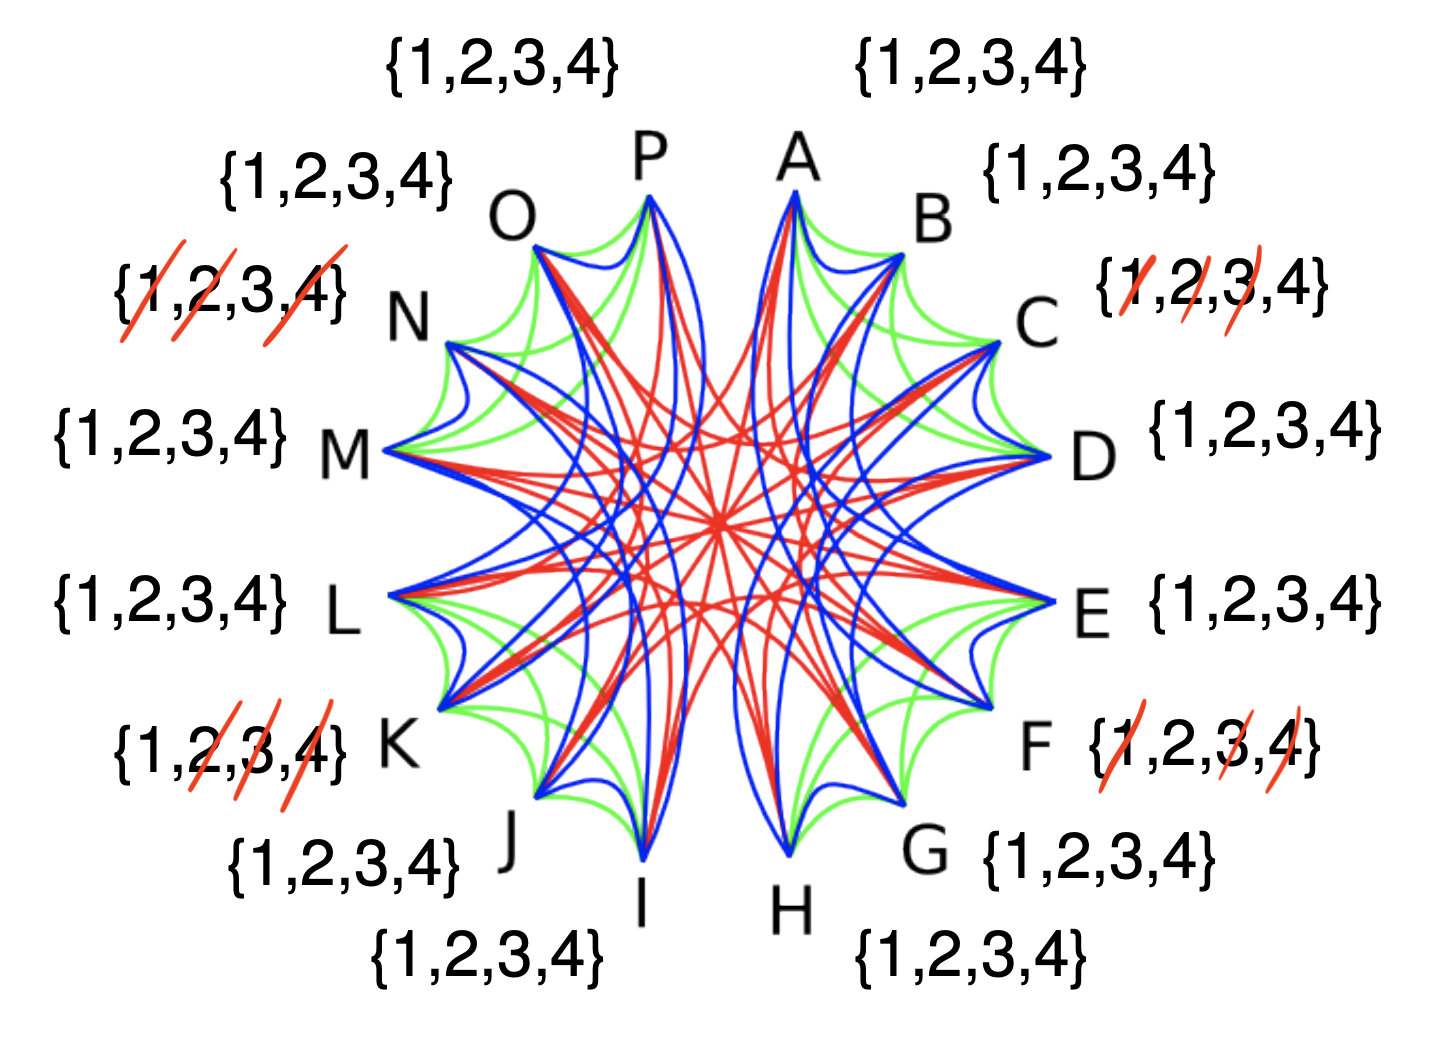
</center>

## Algorithm Converges

<center>
    
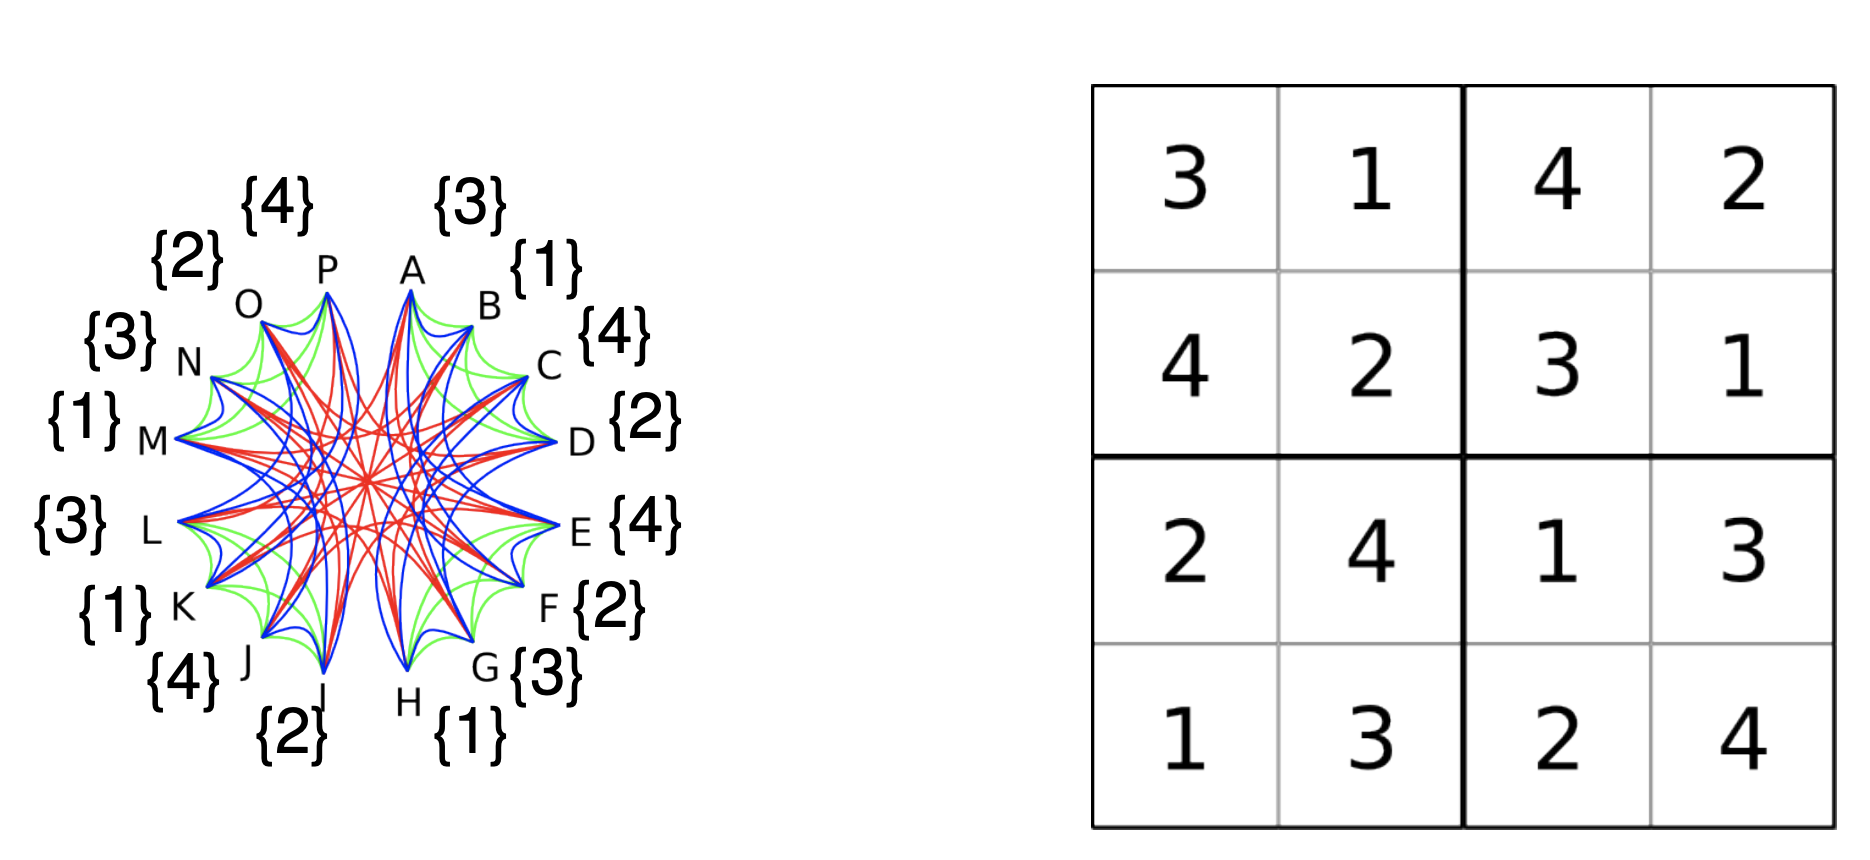
</center>

## Solving Sudoku using CLP

Use bounds library, which is a simple integer solver with upper and lower bounds.

**Notebook note:** You will need to restart the kernel before running the subsequent examples.

In [1]:
?- use_module(library(bounds)).

true.

In [2]:
diff2(L) :- L in 1..4, all_different(L).

Added 1 clauses(s).

## Solving sudoku using CLP

The rest of the rules remain the same. 

In [3]:
rows2([A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P]) :- 
  diff2([A,B,C,D]), diff2([E,F,G,H]),
  diff2([I,J,K,L]), diff2([M,N,O,P]).
  
cols2([A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P]) :-  
  diff2([A,E,I,M]), diff2([B,F,J,N]),
  diff2([C,G,K,O]), diff2([D,H,L,P]).
  
box2([A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P]) :- 
  diff2([A,B,E,F]), diff2([C,D,G,H]),
  diff2([I,J,M,N]), diff2([K,L,O,P]).
  
sudoku2(L) :- rows2(L), cols2(L), box2(L), label(L).

Added 4 clauses(s).

## Solving sudoku using CLP

In [4]:
?- sudoku2([A,B,4,D,E,2,G,H,I,J,1,L,M,3,O,P]).

A = 3, B = 1, E = 4, D = 2, G = 3, I = 2, H = 1, J = 4, M = 1, L = 3, O = 2, P = 4 .

**Exercise**: Solve 9x9 sudoku using CLP.

<center>

<h1> Fin. </h1>
</center>